# Task - 3



## **Task has been mentioned at the end of this notebook**  

In [2]:
# Import all the required Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('Clean.csv')

In [3]:
df1.shape

(10000, 25)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   Accomodation_Type        10000 non-null  int64  
 2   Reco_Insurance_Type      10000 non-null  int64  
 3   Is_Spouse                10000 non-null  int64  
 4   Holding_Policy_Duration  10000 non-null  int64  
 5   Reco_Policy_Premium      10000 non-null  float64
 6   Response                 10000 non-null  int64  
 7   X1                       10000 non-null  float64
 8   X2                       10000 non-null  float64
 9   X3                       10000 non-null  float64
 10  X4                       10000 non-null  float64
 11  X5                       10000 non-null  float64
 12  X6                       10000 non-null  float64
 13  X7                       10000 non-null  float64
 14  X8                     

## Observe that 26.5% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance.

**To Do:**
1. Read about Oversampling and Undersampling.
2. Perform undersampling.

In [5]:
df1['Response'].value_counts()

0    7541
1    2459
Name: Response, dtype: int64

In [6]:
from imblearn.under_sampling import RandomUnderSampler

In [7]:
sampler=RandomUnderSampler()

In [8]:
X=df1.drop('Response',axis=1)
y=df1['Response']

In [9]:
print(X.shape,y.shape)

(10000, 24) (10000,)


In [10]:
predicts,response=sampler.fit_resample(X,y)

In [11]:
print(predicts.shape,response.shape)

(4918, 24) (4918,)


In [12]:
response.value_counts()

1    2459
0    2459
Name: Response, dtype: int64

## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

In [13]:
predicts.head()

,Unnamed: 0,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Premium,X1,X2,X3,X4,...,Age,City_Code_C10-C18,City_Code_C19-C27,City_Code_C28-C36,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Reco_Policy_Cat_12-15,Reco_Policy_Cat_16-22,Reco_Policy_Cat_6-11
0,8578,1,0,1,15,26656.0,0.0,1.0,0.0,0.0,...,70.5,0,0,0,0,1,0,0,1,0
1,2223,0,1,0,15,9688.0,1.0,0.0,0.0,0.0,...,28.0,0,0,0,0,1,0,0,0,0
2,642,1,1,0,2,13530.0,1.0,0.0,0.0,0.0,...,43.0,0,1,0,0,0,0,0,0,0
3,1392,0,1,0,15,12100.0,0.0,0.0,0.0,1.0,...,43.0,0,0,0,0,1,0,0,1,0
4,7955,1,0,1,9,19084.8,0.0,1.0,0.0,0.0,...,45.0,0,1,0,0,0,0,1,0,0


In [14]:
predicts.shape

(4918, 24)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
predicts['Age']=scaler.fit_transform(predicts[['Age']])
predicts['Holding_Policy_Duration']=scaler.fit_transform(predicts[['Holding_Policy_Duration']])
predicts['Reco_Policy_Premium']=scaler.fit_transform(predicts[['Reco_Policy_Premium']])

In [17]:
predicts

,Unnamed: 0,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Premium,X1,X2,X3,X4,...,Age,City_Code_C10-C18,City_Code_C19-C27,City_Code_C28-C36,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Reco_Policy_Cat_12-15,Reco_Policy_Cat_16-22,Reco_Policy_Cat_6-11
0,8578,1,0,1,0.922193,1.977447,0.0,1.0,0.0,0.0,...,1.567939,0,0,0,0,1,0,0,1,0
1,2223,0,1,0,0.922193,-0.700290,1.0,0.0,0.0,0.0,...,-0.928245,0,0,0,0,1,0,0,0,0
2,642,1,1,0,-1.365008,-0.093980,1.0,0.0,0.0,0.0,...,-0.047239,0,1,0,0,0,0,0,0,0
3,1392,0,1,0,0.922193,-0.319650,0.0,0.0,0.0,1.0,...,-0.047239,0,0,0,0,1,0,0,1,0
4,7955,1,0,1,-0.133439,0.782628,0.0,1.0,0.0,0.0,...,0.070229,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,9983,1,1,0,0.746254,1.392600,0.0,0.0,0.0,1.0,...,1.479838,0,0,0,0,1,0,0,1,0
4914,9988,1,1,0,-0.837193,-0.423805,1.0,0.0,0.0,0.0,...,-0.575843,0,0,0,0,1,0,0,1,0
4915,9990,0,1,0,0.922193,-1.640213,0.0,1.0,0.0,0.0,...,-1.221914,0,1,0,0,1,0,0,1,0
4916,9991,0,1,0,-0.485316,-0.058946,1.0,0.0,0.0,0.0,...,0.305163,0,1,0,0,1,0,1,0,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(predicts,response,test_size=0.2)

In [20]:
print(x_train.shape,x_test.shape)

(3934, 24) (984, 24)


In [21]:
print(y_train.shape,y_test.shape)

(3934,) (984,)


## Model Building - Logistic Regression, SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Train the Model using `Accuracy` as the evaluation metric
2. Predict
3. Evaluate use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
4. Compare the perormance of all the models

In [22]:
performance_metrics_with_default_parameters=pd.DataFrame(index=['Accuracy','Precision','Recall','F1_score','AUC'])

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression(max_iter=10000)

In [24]:
LR_model.fit(x_train,y_train)
print('Training Accuracy : ',LR_model.score(x_train,y_train))

Training Accuracy :  0.5554143365531266


In [25]:
lg_pred=LR_model.predict(x_test)
print('Testing Accuracy : ',LR_model.score(x_test,y_test))

Testing Accuracy :  0.5264227642276422


In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score

In [27]:
confusion_matrix(y_test,lg_pred)

array([[234, 267],
       [199, 284]], dtype=int64)

In [28]:
print(classification_report(y_test,lg_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,lg_pred))
print('Precission : ',precision_score(y_test,lg_pred))
print('Recall : ',recall_score(y_test,lg_pred))
print('f1-score : ',f1_score(y_test,lg_pred))
print('Roc Auc score : ',roc_auc_score(y_test,lg_pred))

              precision    recall  f1-score   support

           0       0.54      0.47      0.50       501
           1       0.52      0.59      0.55       483

    accuracy                           0.53       984
   macro avg       0.53      0.53      0.53       984
weighted avg       0.53      0.53      0.52       984


Accuracy is :  0.5264227642276422
Precission :  0.515426497277677
Recall :  0.587991718426501
f1-score :  0.5493230174081237
Roc Auc score :  0.527528793344987


In [29]:
y_preds = LR_model.predict_proba(x_test)[:,1]

In [30]:
from sklearn.metrics import roc_curve,auc
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5496171218639326


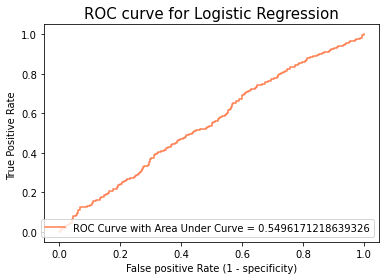

In [31]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Logistic Regression',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [32]:
performance_metrics_with_default_parameters['Logistic Regression']=[accuracy_score(y_test,lg_pred),
                                                                    precision_score(y_test,lg_pred),
                                                                    recall_score(y_test,lg_pred),
                                                                    f1_score(y_test,lg_pred),
                                                                    auc(fpr, tpr)]

# SVM

In [33]:
from sklearn.svm import SVC
svm_model=SVC(probability=True)

In [34]:
svm_model.fit(x_train,y_train)
print('Training Accuracy : ',svm_model.score(x_train,y_train))

Training Accuracy :  0.5063548551093036


In [35]:
sv_pred=svm_model.predict(x_test)
print('Testing Accuracy : ',svm_model.score(x_test,y_test))

Testing Accuracy :  0.47459349593495936


In [36]:
confusion_matrix(y_test,sv_pred)

array([[154, 347],
       [170, 313]], dtype=int64)

In [37]:
print(classification_report(y_test,sv_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,sv_pred))
print('Precission : ',precision_score(y_test,sv_pred))
print('Recall : ',recall_score(y_test,sv_pred))
print('f1-score : ',f1_score(y_test,sv_pred))
print('Roc Auc score : ',roc_auc_score(y_test,sv_pred))

              precision    recall  f1-score   support

           0       0.48      0.31      0.37       501
           1       0.47      0.65      0.55       483

    accuracy                           0.47       984
   macro avg       0.47      0.48      0.46       984
weighted avg       0.47      0.47      0.46       984


Accuracy is :  0.47459349593495936
Precission :  0.47424242424242424
Recall :  0.6480331262939959
f1-score :  0.5476815398075241
Roc Auc score :  0.4777091779174571


In [38]:
y_preds = svm_model.predict_proba(x_test)[:,1]

In [39]:
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5284503456854407


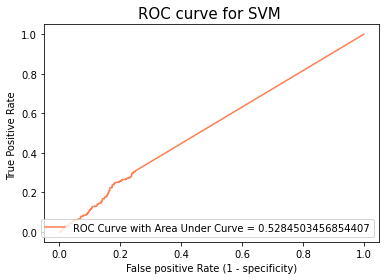

In [40]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for SVM ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [41]:
performance_metrics_with_default_parameters['SVM']=[accuracy_score(y_test,sv_pred),
                                                                    precision_score(y_test,sv_pred),
                                                                    recall_score(y_test,sv_pred),
                                                                    f1_score(y_test,sv_pred),
                                                                    auc(fpr, tpr)]

# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

In [43]:
dt_model.fit(x_train,y_train)
print('Training Accuracy : ',dt_model.score(x_train,y_train))

Training Accuracy :  1.0


In [44]:
dt_pred=dt_model.predict(x_test)
print('Testing Accuracy : ',dt_model.score(x_test,y_test))

Testing Accuracy :  0.5264227642276422


In [45]:
confusion_matrix(y_test,dt_pred)

array([[260, 241],
       [225, 258]], dtype=int64)

In [46]:
print(classification_report(y_test,dt_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,dt_pred))
print('Precission : ',precision_score(y_test,dt_pred))
print('Recall : ',recall_score(y_test,dt_pred))
print('f1-score : ',f1_score(y_test,dt_pred))
print('Roc Auc score : ',roc_auc_score(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.54      0.52      0.53       501
           1       0.52      0.53      0.53       483

    accuracy                           0.53       984
   macro avg       0.53      0.53      0.53       984
weighted avg       0.53      0.53      0.53       984


Accuracy is :  0.5264227642276422
Precission :  0.5170340681362725
Recall :  0.5341614906832298
f1-score :  0.5254582484725051
Roc Auc score :  0.5265617832657665


In [47]:
y_preds = dt_model.predict_proba(x_test)[:,1]

In [48]:
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5265617832657665


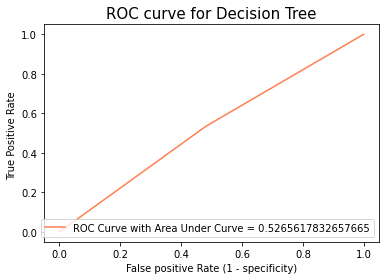

In [49]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Decision Tree',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [50]:
performance_metrics_with_default_parameters['Decision Tree']=[accuracy_score(y_test,dt_pred),
                                                                    precision_score(y_test,dt_pred),
                                                                    recall_score(y_test,dt_pred),
                                                                    f1_score(y_test,dt_pred),
                                                                    auc(fpr, tpr)]

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

In [52]:
rf_model.fit(x_train,y_train)
print('Training Accuracy : ',rf_model.score(x_train,y_train))

Training Accuracy :  1.0


In [53]:
rf_pred=rf_model.predict(x_test)
print('Testing Accuracy : ',rf_model.score(x_test,y_test))

Testing Accuracy :  0.5101626016260162


In [54]:
confusion_matrix(y_test,rf_pred)

array([[260, 241],
       [241, 242]], dtype=int64)

In [55]:
print(classification_report(y_test,rf_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,rf_pred))
print('Precission : ',precision_score(y_test,rf_pred))
print('Recall : ',recall_score(y_test,rf_pred))
print('f1-score : ',f1_score(y_test,rf_pred))
print('Roc Auc score : ',roc_auc_score(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.52      0.52      0.52       501
           1       0.50      0.50      0.50       483

    accuracy                           0.51       984
   macro avg       0.51      0.51      0.51       984
weighted avg       0.51      0.51      0.51       984


Accuracy is :  0.5101626016260162
Precission :  0.5010351966873706
Recall :  0.5010351966873706
f1-score :  0.5010351966873706
Roc Auc score :  0.509998636267837


In [56]:
y_preds = rf_model.predict_proba(x_test)[:,1]

In [57]:
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5256629597946962


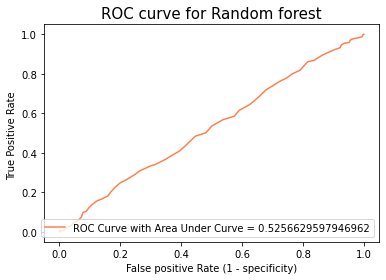

In [58]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Random forest',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [59]:
performance_metrics_with_default_parameters['Random Forest']=[accuracy_score(y_test,rf_pred),
                                                                    precision_score(y_test,rf_pred),
                                                                    recall_score(y_test,rf_pred),
                                                                    f1_score(y_test,rf_pred),
                                                                    auc(fpr, tpr)]

# KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()

In [61]:
knn_model.fit(x_train,y_train)
print('Training Accuracy : ',knn_model.score(x_train,y_train))

Training Accuracy :  0.688357905439756


In [62]:
kn_pred=knn_model.predict(x_test)
print('Testing Accuracy : ',knn_model.score(x_test,y_test))

Testing Accuracy :  0.532520325203252


In [63]:
confusion_matrix(y_test,kn_pred)

array([[265, 236],
       [224, 259]], dtype=int64)

In [64]:
print(classification_report(y_test,kn_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,kn_pred))
print('Precission : ',precision_score(y_test,kn_pred))
print('Recall : ',recall_score(y_test,kn_pred))
print('f1-score : ',f1_score(y_test,kn_pred))
print('Roc Auc score : ',roc_auc_score(y_test,kn_pred))

              precision    recall  f1-score   support

           0       0.54      0.53      0.54       501
           1       0.52      0.54      0.53       483

    accuracy                           0.53       984
   macro avg       0.53      0.53      0.53       984
weighted avg       0.53      0.53      0.53       984


Accuracy is :  0.532520325203252
Precission :  0.5232323232323233
Recall :  0.5362318840579711
f1-score :  0.5296523517382413
Roc Auc score :  0.5325869999132171


In [65]:
y_preds = knn_model.predict_proba(x_test)[:,1]
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5414760541029743


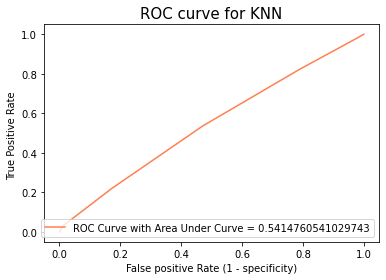

In [66]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for KNN',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [67]:
performance_metrics_with_default_parameters['KNN']=[accuracy_score(y_test,kn_pred),
                                                                    precision_score(y_test,kn_pred),
                                                                    recall_score(y_test,kn_pred),
                                                                    f1_score(y_test,kn_pred),
                                                                    auc(fpr, tpr)]

# Adaboosting

In [68]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier()

In [69]:
adaboost.fit(x_train,y_train)
print('Training Accuracy : ',adaboost.score(x_train,y_train))

Training Accuracy :  0.5920183019827148


In [70]:
ad_pred=adaboost.predict(x_test)
print('Testing Accuracy : ',adaboost.score(x_test,y_test))

Testing Accuracy :  0.5711382113821138


In [71]:
confusion_matrix(y_test,ad_pred)

array([[249, 252],
       [170, 313]], dtype=int64)

In [72]:
print(classification_report(y_test,ad_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,ad_pred))
print('Precission : ',precision_score(y_test,ad_pred))
print('Recall : ',recall_score(y_test,ad_pred))
print('f1-score : ',f1_score(y_test,ad_pred))
print('Roc Auc score : ',roc_auc_score(y_test,ad_pred))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54       501
           1       0.55      0.65      0.60       483

    accuracy                           0.57       984
   macro avg       0.57      0.57      0.57       984
weighted avg       0.57      0.57      0.57       984


Accuracy is :  0.5711382113821138
Precission :  0.5539823008849557
Recall :  0.6480331262939959
f1-score :  0.5973282442748091
Roc Auc score :  0.5725195571589741


In [73]:
y_preds = adaboost.predict_proba(x_test)[:,1]
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5977754635656224


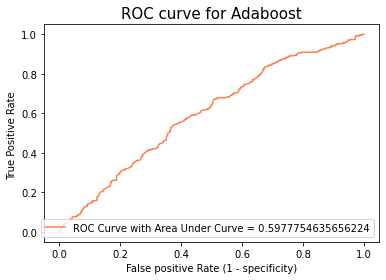

In [74]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Adaboost',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [75]:
performance_metrics_with_default_parameters['Adaboosting']=[accuracy_score(y_test,ad_pred),
                                                                    precision_score(y_test,ad_pred),
                                                                    recall_score(y_test,ad_pred),
                                                                    f1_score(y_test,ad_pred),
                                                                    auc(fpr, tpr)]

# Gradient Boosting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model=GradientBoostingClassifier()

In [77]:
gb_model.fit(x_train,y_train)
print('Training Accuracy : ',gb_model.score(x_train,y_train))

Training Accuracy :  0.6690391459074733


In [78]:
gb_pred=gb_model.predict(x_test)
print('Testing Accuracy : ',gb_model.score(x_test,y_test))

Testing Accuracy :  0.5934959349593496


In [79]:
confusion_matrix(y_test,gb_pred)

array([[269, 232],
       [168, 315]], dtype=int64)

In [80]:
print(classification_report(y_test,gb_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,gb_pred))
print('Precission : ',precision_score(y_test,gb_pred))
print('Recall : ',recall_score(y_test,gb_pred))
print('f1-score : ',f1_score(y_test,gb_pred))
print('Roc Auc score : ',roc_auc_score(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.62      0.54      0.57       501
           1       0.58      0.65      0.61       483

    accuracy                           0.59       984
   macro avg       0.60      0.59      0.59       984
weighted avg       0.60      0.59      0.59       984


Accuracy is :  0.5934959349593496
Precission :  0.5758683729433273
Recall :  0.6521739130434783
f1-score :  0.6116504854368932
Roc Auc score :  0.5945500303740345


In [81]:
y_preds = gb_model.predict_proba(x_test)[:,1]
[fpr, tpr, thr] = roc_curve(y_test, y_preds)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.608402243132782


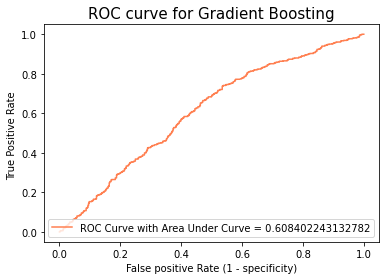

In [82]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Gradient Boosting',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [83]:
performance_metrics_with_default_parameters['Gradient Boosting']=[accuracy_score(y_test,gb_pred),
                                                                    precision_score(y_test,gb_pred),
                                                                    recall_score(y_test,gb_pred),
                                                                    f1_score(y_test,gb_pred),
                                                                    auc(fpr, tpr)]

# Comparing performance

In [84]:
performance_metrics_with_default_parameters

,Logistic Regression,SVM,Decision Tree,Random Forest,KNN,Adaboosting,Gradient Boosting
Accuracy,0.526423,0.474593,0.526423,0.510163,0.532520,0.571138,0.593496
Precision,0.515426,0.474242,0.517034,0.501035,0.523232,0.553982,0.575868
Recall,0.587992,0.648033,0.534161,0.501035,0.536232,0.648033,0.652174
F1_score,0.549323,0.547682,0.525458,0.501035,0.529652,0.597328,0.611650
AUC,0.549617,0.528450,0.526562,0.525663,0.541476,0.597775,0.608402


In [85]:
print('Logistic Regression Model Accuracy : ', accuracy_score(y_test,lg_pred))
print('SVM Model Accuracy : ', accuracy_score(y_test,sv_pred))
print('KNeighborsClassifier Model Accuracy : ', accuracy_score(y_test,kn_pred))
print('DecisionTreeClassifier Model Accuracy : ', accuracy_score(y_test,dt_pred))
print('RandomForestClassifier Model Accuracy : ', accuracy_score(y_test,rf_pred))
print('GradientBoostingClassifier Model Accuracy : ', accuracy_score(y_test,gb_pred))
print('AdaBoostClassifier Model Accuracy : ', accuracy_score(y_test,ad_pred))

Logistic Regression Model Accuracy :  0.5264227642276422
SVM Model Accuracy :  0.47459349593495936
KNeighborsClassifier Model Accuracy :  0.532520325203252
DecisionTreeClassifier Model Accuracy :  0.5264227642276422
RandomForestClassifier Model Accuracy :  0.5101626016260162
GradientBoostingClassifier Model Accuracy :  0.5934959349593496
AdaBoostClassifier Model Accuracy :  0.5711382113821138


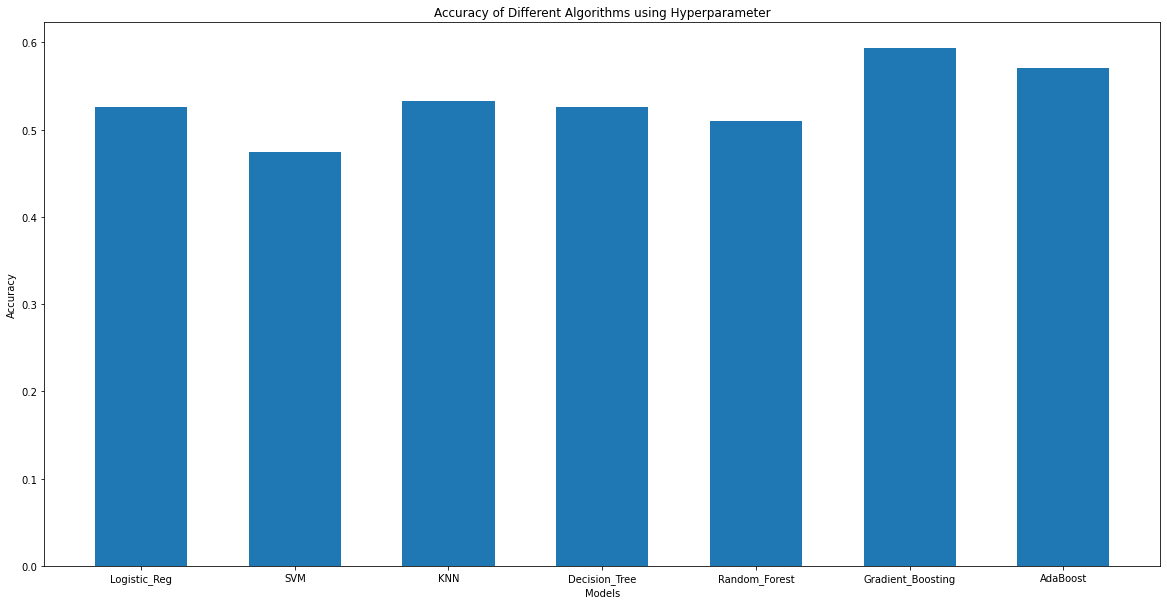

In [3]:
x = np.array(["Logistic_Reg","SVM", "KNN", "Decision_Tree", "Random_Forest", "Gradient_Boosting", "AdaBoost"])
y = np.array([0.5264,0.4745,0.5325,0.5264,0.5101,0.5934,0.5711])
width = 0.6
plt.figure(figsize=[20,10])
plt.bar(x,y,width)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms using Hyperparameter')
plt.show()


# Some conclusion 
###### Here we conclude that all the models having good accuracy instead of SVM and KNN.
###### Reco_Policy_Cat, Holding_Policy_Type are most imported features
###### If Holding_Policy_Type is of type 1 or 3, then they have more chances of cross selling insurance
###### If Holding policy duration in in bet 1, 2, 4 or more than 14 years then we have more chance to cross sell